In [1]:
import pandas as pd

df = pd.read_csv("subset_cs2cd.csv")

C:\Users\kilua\AppData\Local\Temp\ipykernel_40392\2873394677.py:3: DtypeWarning: Columns (9,22,31,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("subset_cs2cd.csv")


In [2]:
df.head()

,X,Y,Z,tick,steamid,velocity_X,velocity_Y,velocity_Z,is_airborne,is_walking,...,approximate_spotted_by,is_scoped,health,armor_value,is_alive,is_cheater,map,server,avg_rank,match_making_type
0,2397.00000,2079.000000,132.76755,1,Player_7,NaN,NaN,NaN,False,False,...,[],False,100.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
1,-1498.16320,500.293600,-63.96875,1,Player_1,NaN,NaN,NaN,False,False,...,[],False,17.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
2,181.65054,634.895400,81.24522,1,Player_4,NaN,NaN,NaN,False,False,...,[],False,23.0,99.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
3,-1666.27230,480.882400,-63.96875,1,Player_2,NaN,NaN,NaN,False,False,...,[],False,100.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking
4,1066.82300,28.896843,256.03125,1,Player_6,NaN,NaN,NaN,False,True,...,[],False,14.0,0.0,True,0,de_inferno,eu_north Server,7060,Premier Matchmaking


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30716718 entries, 0 to 30716717
Data columns (total 42 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   X                         float64
 1   Y                         float64
 2   Z                         float64
 3   tick                      int64  
 4   steamid                   object 
 5   velocity_X                float64
 6   velocity_Y                float64
 7   velocity_Z                float64
 8   is_airborne               bool   
 9   is_walking                object 
 10  yaw                       float64
 11  pitch                     float64
 12  usercmd_mouse_dx          float64
 13  usercmd_mouse_dy          float64
 14  usercmd_viewangle_x       float64
 15  usercmd_viewangle_y       float64
 16  aim_punch_angle           object 
 17  i_recoil_idx              float64
 18  fl_recoil_idx             float64
 19  active_weapon             float64
 20  active_weapon_ammo    

In [4]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes.value_counts())
print("\nValores nulos por columna (%):\n", (df.isna().mean()*100).sort_values(ascending=False).head(10))

Shape: (30716718, 42)

Dtypes:
 float64    23
object     11
int64       6
bool        2
Name: count, dtype: int64

Valores nulos por columna (%):
 last_shot_time              27.937431
i_recoil_idx                27.937431
fl_recoil_idx               27.937431
active_weapon_ammo          27.937431
next_primary_attack_tick    27.936884
total_ammo_left             27.936884
usercmd_viewangle_x          2.904969
usercmd_viewangle_y          2.904969
usercmd_mouse_dx             2.904536
usercmd_mouse_dy             2.904536
dtype: float64


In [5]:
print(df.describe().T[["mean","50%","std","min","max"]].round(2))

                                 mean          50%         std        min  \
X                             -103.03      -152.43     1170.29   -2651.83   
Y                              503.80       529.21     1418.13   -2603.08   
Z                              -54.13       -63.97      152.05    -367.97   
tick                         50732.96     42596.00    38137.19       1.00   
velocity_X                       0.08         0.00     1304.00 -265327.60   
velocity_Y                      -0.06         0.00     1460.03 -303118.70   
velocity_Z                       0.01         0.00      114.96  -25536.97   
yaw                             -0.67         2.43      101.59    -180.00   
pitch                            3.23         1.83        9.01     -89.00   
usercmd_mouse_dx                -1.55         0.00      169.63   -8179.00   
usercmd_mouse_dy                 1.27         0.00       34.33   -4377.00   
usercmd_viewangle_x              3.26         1.89        9.06     -89.00   

is_cheater
0    25759271
1     4957447
Name: count, dtype: int64


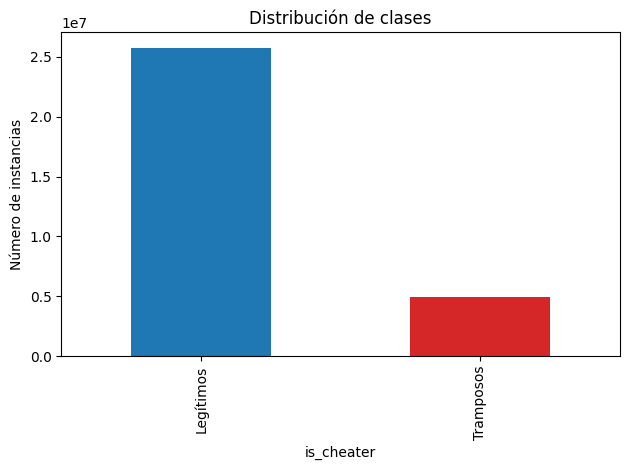

In [6]:
import matplotlib.pyplot as plt
class_counts = df['is_cheater'].value_counts().sort_index()
print(class_counts)
class_counts.plot(kind='bar', color=['C0','C3'])
plt.xticks([0,1], ['Legítimos','Tramposos'])
plt.ylabel('Número de instancias')
plt.title('Distribución de clases')
plt.tight_layout()
plt.show()

In [7]:
cols = ['yaw','pitch','velocity_X','velocity_Z']
desc_stats = df.groupby('is_cheater')[cols].describe().unstack(1)
print(desc_stats)
summary = df.groupby('is_cheater')[cols].agg(['mean','std','min','max'])
print(summary)


                   is_cheater
yaw         count  0             2.494090e+07
                   1             4.890504e+06
            mean   0            -4.399966e+00
                   1             1.836728e+01
            std    0             1.010662e+02
                                     ...     
velocity_Z  50%    1             0.000000e+00
            75%    0             0.000000e+00
                   1             0.000000e+00
            max    0             1.919660e+04
                   1             2.253440e+04
Length: 64, dtype: float64
                  yaw                                   pitch            \
                 mean         std    min        max      mean       std   
is_cheater                                                                
0           -4.399966  101.066205 -180.0  179.99966  3.283567  9.254105   
1           18.367276  102.133648 -180.0  179.99966  2.932663  7.638038   

                              velocity_X                     

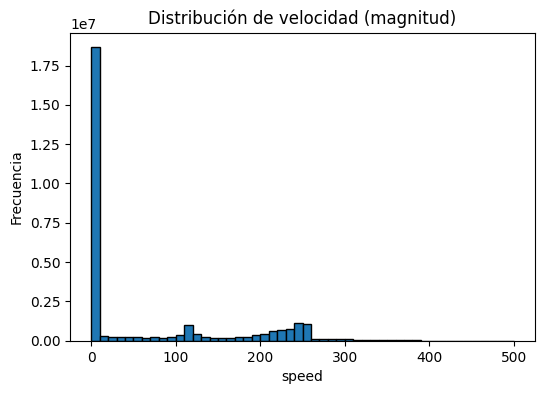

In [8]:
df["speed"] = (df["velocity_X"]**2 + df["velocity_Y"]**2 + df["velocity_Z"]**2)**0.5

plt.figure(figsize=(6,4))
plt.hist(df["speed"], bins=50, edgecolor="k", range=(0,500))
plt.title("Distribución de velocidad (magnitud)")
plt.xlabel("speed")
plt.ylabel("Frecuencia")
plt.show()

<Figure size 600x400 with 0 Axes>

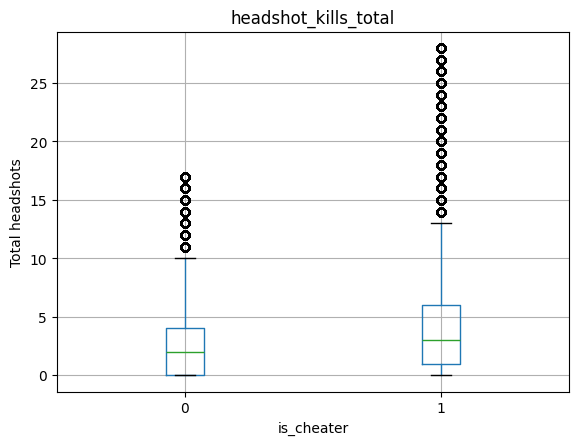

In [9]:
plt.figure(figsize=(6,4))
df.boxplot(column="headshot_kills_total", by="is_cheater")
plt.suptitle("")
plt.xlabel("is_cheater")
plt.ylabel("Total headshots")
plt.show()

In [21]:
grouped = df.groupby("is_cheater")[["speed","headshot_kills_total","shots_fired"]]
print(grouped.mean().round(2))
print(grouped.quantile([0.25,0.5,0.75]).unstack().round(2))

             speed  headshot_kills_total  shots_fired
is_cheater                                           
0            77.08                  1.64         0.43
1           109.28                  4.09         0.01
           speed              headshot_kills_total           shots_fired       \
            0.25 0.50    0.75                 0.25 0.50 0.75        0.25 0.50   
is_cheater                                                                      
0            0.0  0.0  111.80                  0.0  1.0  2.0         0.0  0.0   
1            0.0  0.0  172.51                  1.0  3.0  6.0         0.0  0.0   

                 
           0.75  
is_cheater       
0           0.0  
1           0.0  


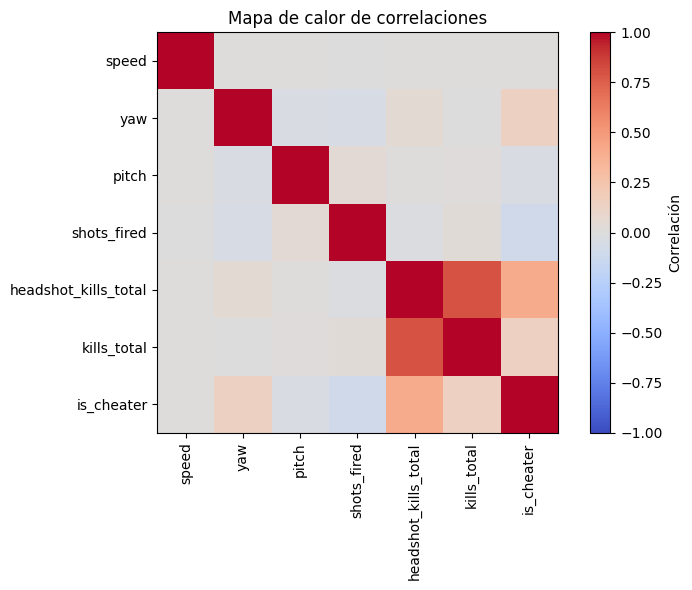

In [23]:
num_cols = ["speed","yaw","pitch","shots_fired","headshot_kills_total","kills_total","is_cheater"]
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar(label="Correlación")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

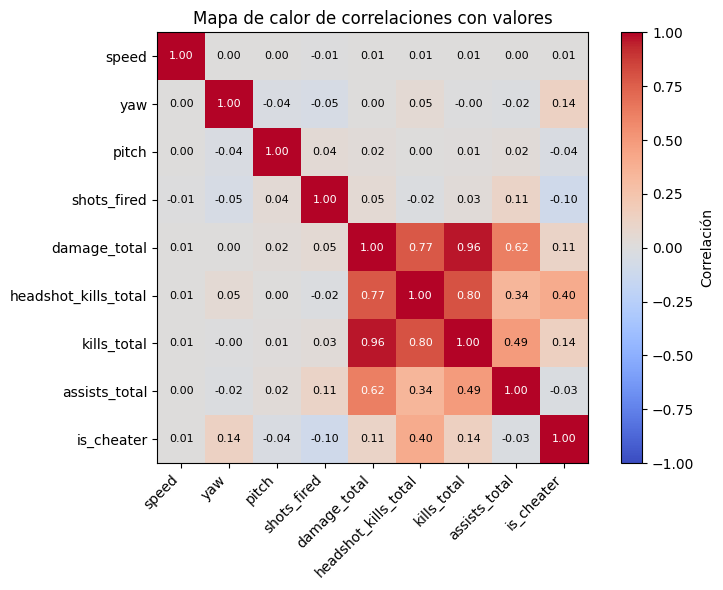

In [ ]:
cols_corr = [
    "speed", "yaw", "pitch", "shots_fired", "damage_total",
    "headshot_kills_total", "kills_total", "assists_total", "deaths_total", "is_cheater"
]
corr = df[cols_corr].corr()
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")
for i in range(len(cols_corr)):
    for j in range(len(cols_corr)):
        val = corr.values[i, j]
        ax.text(j, i, f"{val:.2f}", ha="center", va="center",
                color="white" if abs(val) > 0.5 else "black", fontsize=8)
ax.set_xticks(range(len(cols_corr)))
ax.set_yticks(range(len(cols_corr)))
ax.set_xticklabels(cols_corr, rotation=45, ha="right")
ax.set_yticklabels(cols_corr)
ax.set_title("Mapa de calor de correlaciones con valores")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Correlación")
plt.tight_layout()
plt.show()

In [ ]:
prop = (df.groupby("map")["is_cheater"]
          .mean()
          .sort_values(ascending=False)
          .head(10))
print(prop)

map
de_edin       0.900000
de_train      0.629271
cs_office     0.500000
de_basalt     0.500000
de_mirage     0.158947
de_dust2      0.100000
de_inferno    0.000000
Name: is_cheater, dtype: float64


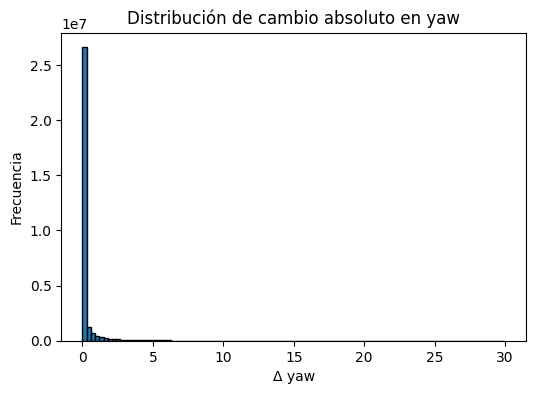

In [23]:
df["delta_yaw"] = df.groupby("steamid")["yaw"].diff().abs().fillna(0)
plt.figure(figsize=(6,4))
plt.hist(df["delta_yaw"], bins=100, range=(0,30), edgecolor="k")
plt.title("Distribución de cambio absoluto en yaw")
plt.xlabel("Δ yaw")
plt.ylabel("Frecuencia")
plt.show()

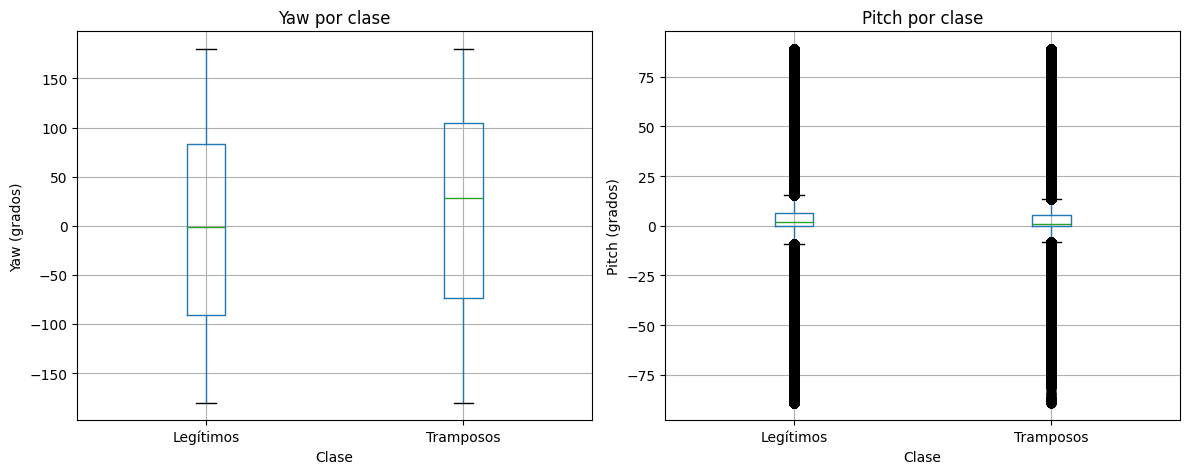

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

df.boxplot(column='yaw', by='is_cheater', ax=axes[0])
axes[0].set_title('Yaw por clase')
axes[0].set_xlabel('Clase')
axes[0].set_xticklabels(['Legítimos','Tramposos'])
axes[0].set_ylabel('Yaw (grados)')

df.boxplot(column='pitch', by='is_cheater', ax=axes[1])
axes[1].set_title('Pitch por clase')
axes[1].set_xlabel('Clase')
axes[1].set_xticklabels(['Legítimos','Tramposos'])
axes[1].set_ylabel('Pitch (grados)')

plt.suptitle('')
plt.tight_layout()
plt.show()


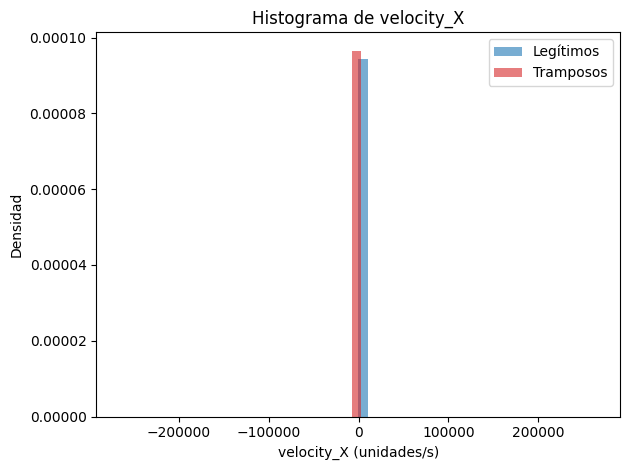

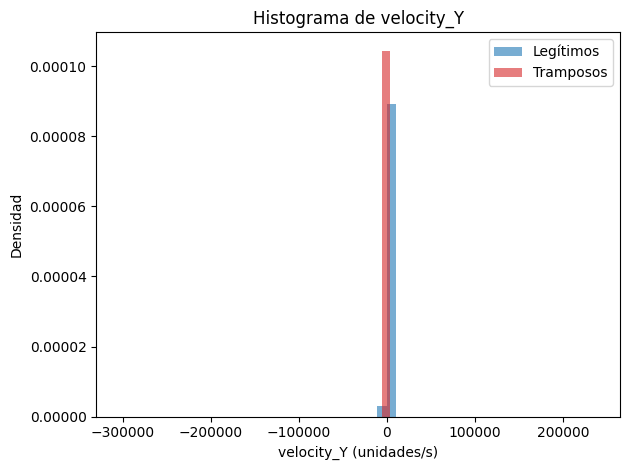

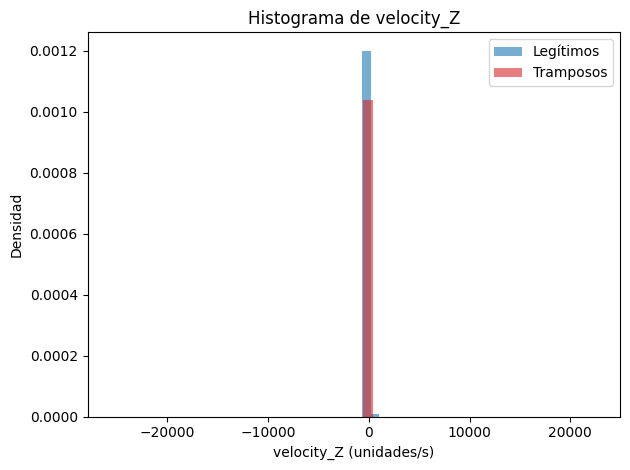

In [ ]:
for axis in ['velocity_X','velocity_Y','velocity_Z']:
    plt.figure()
    for valor, label, color in [(0,'Legítimos','C0'), (1,'Tramposos','C3')]:
        subset = df[df['is_cheater']==valor]
        plt.hist(subset[axis], bins=50, alpha=0.6, label=label, color=color, density=True)
    plt.title(f'Histograma de {axis}')
    plt.xlabel(f'{axis} (unidades/s)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Asumiendo que tu DataFrame se llama 'df'
# Creamos una nueva columna que calcula la diferencia de bajas con la fila anterior,
# agrupando por jugador para no mezclar datos.
df['new_kill'] = df.groupby('steamid')['kills_total'].diff()

# Los eventos de baja son aquellos donde la diferencia es 1.
kill_events_df = df[df['new_kill'] == 1].copy()

print(f"Se identificaron {len(kill_events_df)} eventos de baja en el dataset.")

In [ ]:
# Lista para guardar los datos de análisis de cada ventana pre-kill
pre_kill_data = []

# Iteramos sobre cada evento de baja que encontramos
for index, kill_event in kill_events_df.iterrows():
    steam_id = kill_event['steamid']
    kill_tick = kill_event['tick']
    is_cheater = kill_event['is_cheater']
    
    # Definimos la ventana de tiempo (3 segundos antes de la baja)
    start_tick = kill_tick - (64 * 3)
    
    # Seleccionamos todos los datos de ese jugador en esa ventana de tiempo
    pre_kill_window_df = df[(df['steamid'] == steam_id) & (df['tick'] >= start_tick) & (df['tick'] < kill_tick)]
    
    if not pre_kill_window_df.empty:
        # Calculamos estadísticas de los movimientos del ratón en esa ventana
        mouse_variance = pre_kill_window_df['usercmd_mouse_dx'].var() + pre_kill_window_df['usercmd_mouse_dy'].var()
        mouse_abs_sum = pre_kill_window_df['usercmd_mouse_dx'].abs().sum() + pre_kill_window_df['usercmd_mouse_dy'].abs().sum()
        
        pre_kill_data.append({
            'variance': mouse_variance,
            'abs_sum': mouse_abs_sum,
            'is_cheater': is_cheater
        })

# Convertimos la lista de resultados a un nuevo DataFrame para el análisis
pre_kill_analysis_df = pd.DataFrame(pre_kill_data)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparamos la varianza del movimiento del ratón
sns.boxplot(x='is_cheater', y='variance', data=pre_kill_analysis_df)
plt.title('Varianza del Movimiento del Ratón 3 segundos antes de una Baja')
plt.show()

# Comparamos la suma de movimientos absolutos
sns.boxplot(x='is_cheater', y='abs_sum', data=pre_kill_analysis_df)
plt.title('Suma de Movimientos del Ratón 3 segundos antes de una Baja')
plt.show()